In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [101]:
df1=pd.read_csv('fdset1.csv')

In [102]:
df1.head()

,YEAR,QUARTER,MONTH,PEAK DEMAND,DEMAND MET,REGION,STATE,DEMAND NOT MET,DEMAND
0,2011.0,Q1,1.0,200.0,200.0,NORTH,CHANDIGARH,0,200.0
1,2011.0,Q1,1.0,4114.0,4111.0,NORTH,DELHI,-3,4114.0
2,2011.0,Q1,1.0,5403.0,5000.0,NORTH,HARYANA,-403,5403.0
3,2011.0,Q1,1.0,1278.0,1043.0,NORTH,HIMACHAL PRADESH,-235,1278.0
4,2011.0,Q1,1.0,2369.0,1571.0,NORTH,JAMMU & KASHMIR,-798,2369.0


In [103]:
df1.tail()

,YEAR,QUARTER,MONTH,PEAK DEMAND,DEMAND MET,REGION,STATE,DEMAND NOT MET,DEMAND
7196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df1.shape

(7201, 9)

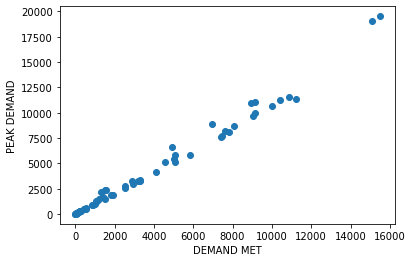

In [105]:
import matplotlib.pyplot as plt
plt.xlabel("DEMAND MET")
plt.ylabel("PEAK DEMAND")
plt.scatter(df1["DEMAND MET"][1:65],df1["PEAK DEMAND"][1:65])

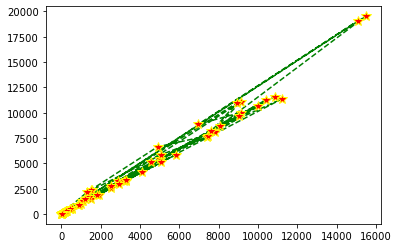

In [106]:
plt.plot(df1["DEMAND MET"][1:65],df1["PEAK DEMAND"][1:65],"g*--",ms=10,mfc="red",mec="yellow")
#[color,marker,linestyle]-ls=--,-.
plt.show()

In [107]:
#seaborn advanced statistical visualisation
#pip install seaborn
import seaborn as sns

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEMAND', ylabel='YEAR'>

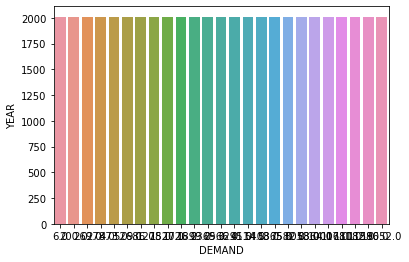

In [108]:
sns.barplot(df1.DEMAND[0:25],df1.YEAR[0:25])

In [109]:
d=pd.read_csv('fdset.csv')

In [110]:
d.head()

,Date,Peak_demand
0,2011-01-01,8053
1,2011-02-01,8190
2,2011-03-01,8430
3,2011-04-01,8479
4,2011-05-01,8139


In [111]:
d.tail()

,Date,Peak_demand
115,2020-08-01,10578
116,2020-09-01,9236
117,2020-10-01,9923
118,2020-11-01,10900
119,2020-12-01,12123


In [112]:
d.shape

(120, 2)

In [113]:
d.isnull()

,Date,Peak_demand
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
115,False,False
116,False,False
117,False,False
118,False,False


In [114]:
d.isnull().sum()

Date           0
Peak_demand    0
dtype: int64

In [115]:
import pandas as pd

# Dataset for 
energy_k = pd.read_csv('fdset.csv')

energy_k['Date'] = pd.to_datetime(energy_k['Date'])
date = energy_k['Date']

In [116]:
energy_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         120 non-null    datetime64[ns]
 1   Peak_demand  120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [117]:
result = adfuller(df)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.8949489153793743
p-value: 0.7896312608383554
Critical Values:
	1%: -3.49181775886872
	5%: -2.8884437992971588
	10%: -2.5811201893779985


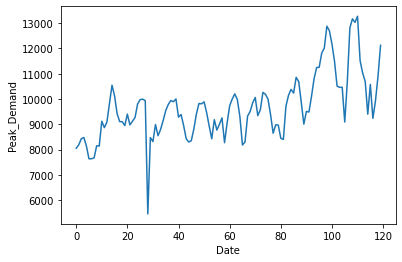

In [118]:
# df = pd.read_csv('air_passengers.csv', parse_dates = ['Month'], index_col = ['Month'])

df.head()
plt.xlabel('Date')
plt.ylabel('Peak_Demand')

plt.plot(energy_k['Peak_demand'])

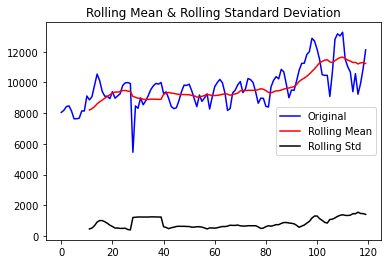

In [119]:
rolling_mean = energy_k.rolling(window = 12).mean()
rolling_std = energy_k.rolling(window = 12).std()
plt.plot(energy_k['Peak_demand'], color = "blue", label = "Original")
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

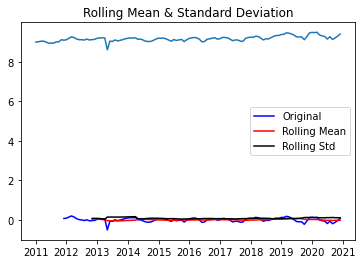

ADF Statistic: -5.807848437870255
p-value: 4.472881250694255e-07
Critical Values:
	1%: -3.4948504603223145
	5%: -2.889758398668639
	10%: -2.5818220155325444


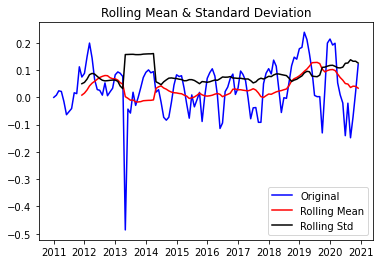

ADF Statistic: -5.72394374767915
p-value: 6.839688586500162e-07
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


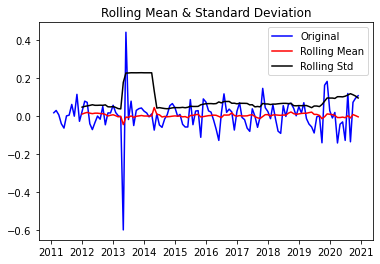

ADF Statistic: -6.360401561824752
p-value: 2.4826370925454115e-08
Critical Values:
	1%: -3.4924012594942333
	5%: -2.8886968193364835
	10%: -2.5812552709190673


C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

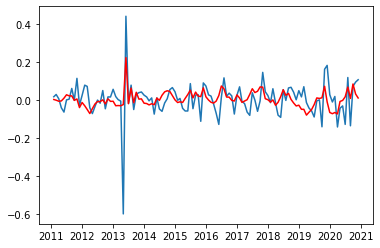

In [120]:
df = pd.read_csv('fdset.csv', parse_dates = ['Date'], index_col = ['Date'])
df_log = np.log(df)
plt.plot(df_log)

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)


rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)


df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

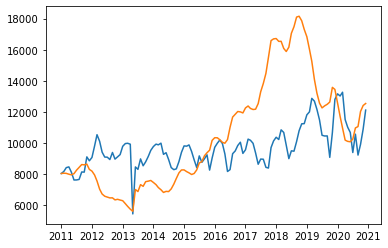

In [121]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Peak_demand'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

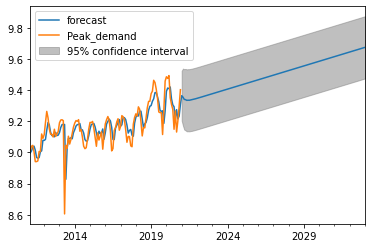

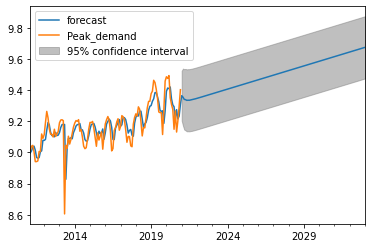

In [122]:
results.plot_predict(1,264)

In [123]:
# forecasting in log of energy demand...
# we can take anti log of these values to get actual forecast...

forecast_for_next_24_month = results.forecast(24)[0]
forecast_for_next_24_month

array([9.36423388, 9.3551516 , 9.34079126, 9.33888002, 9.33445341,
       9.33527998, 9.33492501, 9.33678978, 9.33810581, 9.34036105,
       9.34236377, 9.3447644 , 9.34704969, 9.34950378, 9.35190551,
       9.35437892, 9.3568287 , 9.35930896, 9.36177859, 9.3642612 ,
       9.36673905, 9.36922243, 9.37170369, 9.37418731])

In [124]:
np.exp(forecast_for_next_24_month)

array([11663.66672527, 11558.21361518, 11393.41985593, 11371.66510438,
       11321.43841024, 11330.80026791, 11326.7788276 , 11347.9203497 ,
       11362.86442345, 11388.5193608 , 11411.35023686, 11438.77757898,
       11464.94840203, 11493.11888226, 11520.75541125, 11549.28630655,
       11577.61417242, 11606.36530017, 11635.06419437, 11663.98539896,
       11692.92285839, 11721.99692564, 11751.11833254, 11780.33987379])

In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [126]:
#forecasting for chandigarh

import pandas as pd

# Dataset for 
energy_C = pd.read_csv('chandigarh.csv')

energy_C['Date'] = pd.to_datetime(energy_C['Date'])
date = energy_C['Date']

In [127]:
energy_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         120 non-null    datetime64[ns]
 1   Peak_demand  120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [128]:
df1 = pd.read_csv('chandigarh.csv', parse_dates = ['Date'], index_col = ['Date'])

In [129]:
result = adfuller(df1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.9159275770972546
p-value: 0.3246057712702278
Critical Values:
	1%: -3.4924012594942333
	5%: -2.8886968193364835
	10%: -2.5812552709190673


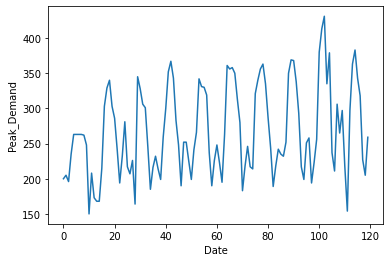

In [130]:
df1.head()
plt.xlabel('Date')
plt.ylabel('Peak_Demand')

plt.plot(energy_C['Peak_demand'])

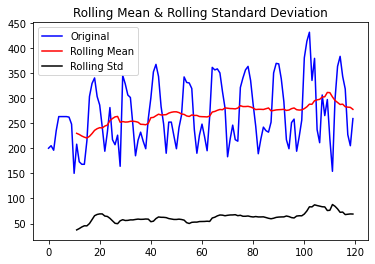

In [131]:
rolling_mean = energy_C.rolling(window = 12).mean()
rolling_std = energy_C.rolling(window = 12).std()
plt.plot(energy_C['Peak_demand'], color = "blue", label = "Original")
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

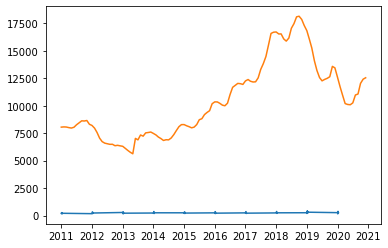

In [132]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Peak_demand'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(predictions_ARIMA)

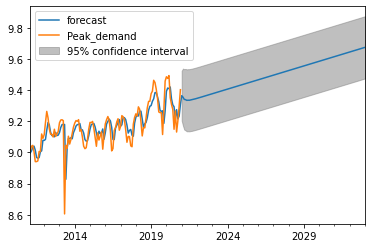

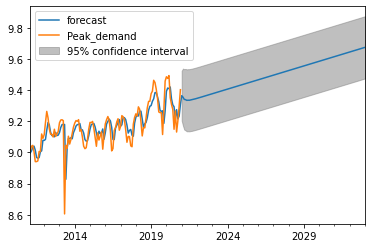

In [133]:
results.plot_predict(1,264)

In [134]:
forecast_for_next_24_month = results.forecast(24)[0]
forecast_for_next_24_month

array([9.36423388, 9.3551516 , 9.34079126, 9.33888002, 9.33445341,
       9.33527998, 9.33492501, 9.33678978, 9.33810581, 9.34036105,
       9.34236377, 9.3447644 , 9.34704969, 9.34950378, 9.35190551,
       9.35437892, 9.3568287 , 9.35930896, 9.36177859, 9.3642612 ,
       9.36673905, 9.36922243, 9.37170369, 9.37418731])

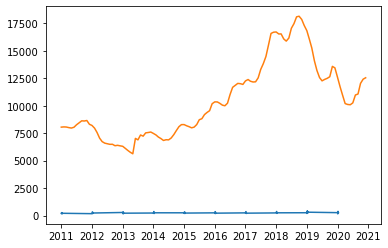

In [135]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Peak_demand'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(predictions_ARIMA)

In [136]:
np.exp(forecast_for_next_24_month)

array([11663.66672527, 11558.21361518, 11393.41985593, 11371.66510438,
       11321.43841024, 11330.80026791, 11326.7788276 , 11347.9203497 ,
       11362.86442345, 11388.5193608 , 11411.35023686, 11438.77757898,
       11464.94840203, 11493.11888226, 11520.75541125, 11549.28630655,
       11577.61417242, 11606.36530017, 11635.06419437, 11663.98539896,
       11692.92285839, 11721.99692564, 11751.11833254, 11780.33987379])